https://medium.com/analytics-vidhya/text-classification-using-word-embeddings-and-deep-learning-in-python-classifying-tweets-from-6fe644fcfc81

https://towardsdatascience.com/creating-word-embeddings-coding-the-word2vec-algorithm-in-python-using-deep-learning-b337d0ba17a8

In [1]:
import numpy as np
import pandas as pd
import re

In [76]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Embedding
# from tensorflow.keras.layers import Input
# from tensorflow.keras.models import 
from tensorflow.keras.layers import LSTM, Input, Dense, Embedding, concatenate, Dropout, concatenate, Bidirectional
# from tensorflow.keras.layers import 
import tensorflow.keras.preprocessing

In [5]:
d = [
  ('This article is awesome', 1),
  ('There are just too much words here', 0), 
  ('The math is actually wrong here', 0),
  ('I really enjoy learning new stuff', 1),
  ('I am kinda lazy so I just skim these texts', 0),
  ('Who cares about AI?', 0),
  ('I will surely be a better person after reading this!', 1),
  ('The author is pretty cute :)', 1)
]

In [6]:
def clean_text(
    string: str, 
    punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~''',
    stop_words=['the', 'a', 'and', 'is', 'be', 'will']) -> str:
    """
    A method to clean text 
    """
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)

    # Removing the punctuations
    for x in string.lower(): 
        if x in punctuations: 
            string = string.replace(x, "") 

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    string = ' '.join([word for word in string.split() if word not in stop_words])

    # Cleaning the whitespaces
    string = re.sub(r'\s+', ' ', string).strip()

    return string    

In [7]:
X_train = [x[0] for x in d] # Text
Y_train = [y[1] for y in d] # Label
X_train = [clean_text(x) for x in X_train]

In [8]:
X_train

['this article awesome',
 'there are just too much words here',
 'math actually wrong here',
 'i really enjoy learning new stuff',
 'i am kinda lazy so i just skim these texts',
 'who cares about ai',
 'i surely better person after reading this',
 'author pretty cute']

In [9]:
Y_train

[1, 0, 0, 1, 0, 0, 1, 1]

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [11]:
tokenizer.word_index

{'i': 1,
 'this': 2,
 'just': 3,
 'here': 4,
 'article': 5,
 'awesome': 6,
 'there': 7,
 'are': 8,
 'too': 9,
 'much': 10,
 'words': 11,
 'math': 12,
 'actually': 13,
 'wrong': 14,
 'really': 15,
 'enjoy': 16,
 'learning': 17,
 'new': 18,
 'stuff': 19,
 'am': 20,
 'kinda': 21,
 'lazy': 22,
 'so': 23,
 'skim': 24,
 'these': 25,
 'texts': 26,
 'who': 27,
 'cares': 28,
 'about': 29,
 'ai': 30,
 'surely': 31,
 'better': 32,
 'person': 33,
 'after': 34,
 'reading': 35,
 'author': 36,
 'pretty': 37,
 'cute': 38}

In [12]:
tokenizer.texts_to_sequences(X_train)

[[2, 5, 6],
 [7, 8, 3, 9, 10, 11, 4],
 [12, 13, 14, 4],
 [1, 15, 16, 17, 18, 19],
 [1, 20, 21, 22, 23, 1, 3, 24, 25, 26],
 [27, 28, 29, 30],
 [1, 31, 32, 33, 34, 35, 2],
 [36, 37, 38]]

In [15]:
class TextToTensor():

    def __init__(self, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.max_len = max_len

    def string_to_tensor(self, string_list: list) -> list:
        """
        A method to convert a string list to a tensor for a deep learning model
        """    
        string_list = self.tokenizer.texts_to_sequences(string_list)
        string_list = pad_sequences(string_list, maxlen=self.max_len)
        
        return string_list

In [17]:
# Getting the biggest sentence
max_len = np.max([len(text.split()) for text in X_train])
# Creating the padded matrices
X_train_NN = tokenizer.texts_to_sequences(X_train)
X_train_NN = pad_sequences(string_list, maxlen=max_len)

NameError: name 'string_list' is not defined

In [18]:
# Tokenizing the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
# Getting the longest sentence
max_len = np.max([len(text.split()) for text in X_train])
# Converting to tensor
TextToTensor_instance = TextToTensor(
tokenizer=tokenizer,
max_len=max_len
)
X_train_NN = TextToTensor_instance.string_to_tensor(X_train)

In [20]:
model = Sequential()
model.add(Embedding(
  input_dim=44, 
  output_dim=3, 
  input_length=max_len))

model.compile('rmsprop', 'mse')
output_array = model.predict(X_train_NN)[0]

In [21]:
output_array

array([[ 0.02903755,  0.0497383 , -0.02927721],
       [ 0.02903755,  0.0497383 , -0.02927721],
       [ 0.02903755,  0.0497383 , -0.02927721],
       [ 0.02903755,  0.0497383 , -0.02927721],
       [ 0.02903755,  0.0497383 , -0.02927721],
       [ 0.02903755,  0.0497383 , -0.02927721],
       [ 0.02903755,  0.0497383 , -0.02927721],
       [ 0.00371461,  0.03594406, -0.0321241 ],
       [-0.04894433, -0.03504934,  0.00124757],
       [-0.02994319, -0.00896982,  0.0406431 ]], dtype=float32)

In [22]:
X_train_NN

array([[ 0,  0,  0,  0,  0,  0,  0,  2,  5,  6],
       [ 0,  0,  0,  7,  8,  3,  9, 10, 11,  4],
       [ 0,  0,  0,  0,  0,  0, 12, 13, 14,  4],
       [ 0,  0,  0,  0,  1, 15, 16, 17, 18, 19],
       [ 1, 20, 21, 22, 23,  1,  3, 24, 25, 26],
       [ 0,  0,  0,  0,  0,  0, 27, 28, 29, 30],
       [ 0,  0,  0,  1, 31, 32, 33, 34, 35,  2],
       [ 0,  0,  0,  0,  0,  0,  0, 36, 37, 38]])

In [31]:
import numpy as np


class Embeddings():
    """
    A class to read the word embedding file and to create the word embedding matrix
    """

    def __init__(self, path, vector_dimension):
        self.path = path 
        self.vector_dimension = vector_dimension
    
    @staticmethod
    def get_coefs(word, *arr): 
        return word, np.asarray(arr, dtype='float32')

    def get_embedding_index(self):
        embeddings_index = dict(self.get_coefs(*o.split(" ")) for o in open(self.path, errors='ignore'))
        return embeddings_index

    def create_embedding_matrix(self, tokenizer=None, max_features=None):
        """
        A method to create the embedding matrix
        """
        model_embed = self.get_embedding_index()

        if max_features is None:
            max_features = len(model_embed)

        word_index = model_embed
        if tokenizer is not None: 
            word_index = tokenizer.word_index

        embedding_matrix = np.zeros((max_features + 1, self.vector_dimension))
        for index, word in enumerate(word_index.keys()):
            if index > max_features:
                break
            else:
                try:
                    embedding_matrix[index] = model_embed[word]
                except:
                    continue
        return embedding_matrix

In [30]:
embed_path = 'glove.6B.50d.txt'
embed_dim = 50

In [32]:
# Tokenizing the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
# Creating the embedding matrix
embedding = Embeddings(embed_path, embed_dim)
embedding_matrix = embedding.create_embedding_matrix(tokenizer, len(tokenizer.word_counts))

In [34]:
# Converting to tensor
TextToTensor_instance = TextToTensor(
tokenizer=tokenizer,
max_len=max_len
)
X_train_NN = TextToTensor_instance.string_to_tensor(X_train)
model = Sequential()
model.add(Embedding(
  input_dim=39,
  output_dim=50, 
  input_length=max_len,
  weights=[embedding_matrix]))

model.compile('rmsprop', 'mse')
output_array = model.predict(X_train_NN)[0]

In [36]:
output_array.shape

(10, 50)

In [35]:
output_array

array([[ 1.1891e-01,  1.5255e-01, -8.2073e-02, -7.4144e-01,  7.5917e-01,
        -4.8328e-01, -3.1009e-01,  5.1476e-01, -9.8708e-01,  6.1757e-04,
        -1.5043e-01,  8.3770e-01, -1.0797e+00, -5.1460e-01,  1.3188e+00,
         6.2007e-01,  1.3779e-01,  4.7108e-01, -7.2874e-02, -7.2675e-01,
        -7.4116e-01,  7.5263e-01,  8.8180e-01,  2.9561e-01,  1.3548e+00,
        -2.5701e+00, -1.3523e+00,  4.5880e-01,  1.0068e+00, -1.1856e+00,
         3.4737e+00,  7.7898e-01, -7.2929e-01,  2.5102e-01, -2.6156e-01,
        -3.4684e-01,  5.5841e-01,  7.5098e-01,  4.9830e-01, -2.6823e-01,
        -2.7443e-03, -1.8298e-02, -2.8096e-01,  5.5318e-01,  3.7706e-02,
         1.8555e-01, -1.5025e-01, -5.7512e-01, -2.6671e-01,  9.2121e-01],
       [ 1.1891e-01,  1.5255e-01, -8.2073e-02, -7.4144e-01,  7.5917e-01,
        -4.8328e-01, -3.1009e-01,  5.1476e-01, -9.8708e-01,  6.1757e-04,
        -1.5043e-01,  8.3770e-01, -1.0797e+00, -5.1460e-01,  1.3188e+00,
         6.2007e-01,  1.3779e-01,  4.7108e-01, -7.

In [37]:
# Importing generic python packages
import pandas as pd
# Reading the data
train = pd.read_csv('data/train.csv')[['text', 'target']]
test = pd.read_csv('data/test.csv')
# Creating the input for the pipeline
X_train = train['text'].tolist()
Y_train = train['target'].tolist()
X_test = test['text'].tolist()

In [38]:
train.groupby(['target'], as_index=False).count()

,target,text
0,0,4342
1,1,3271


In [40]:
# Reading the stop words
stop_words = []
try:
    stop_words = pd.read_csv('data/stop_words.txt', sep='\n', header=None)[0].tolist()
except Exception as e:
    # This exception indicates that the file is missing or is in a bad format
    print('Bad stop_words.txt file: {e}')

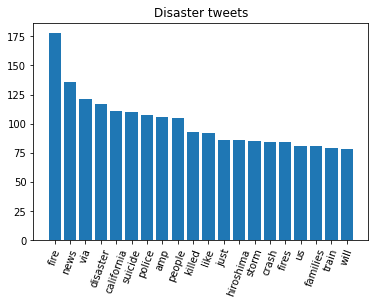

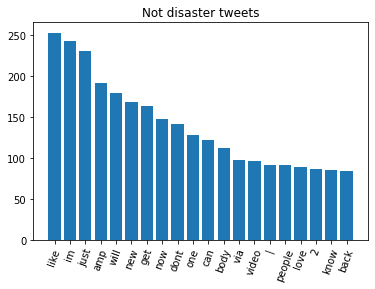

In [41]:
# Counting the number of words
from collections import Counter
# Plotting functions
import matplotlib.pyplot as plt
X_train = [clean_text(text) for text in X_train]
Y_train = np.asarray(Y_train)
# Tokenizing the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
# Getting the most frequent words
d1 = train.loc[train['target']==1, 'text'].tolist()
d0 = train.loc[train['target']==0, 'text'].tolist()
d1 = [clean_text(x, stop_words=stop_words) for x in d1]
d0 = [clean_text(x, stop_words=stop_words) for x in d0]
d1_text = ' '.join(d1).split()
d0_text = ' '.join(d0).split()
topd1 = Counter(d1_text)
topd0 = Counter(d0_text)
topd1 = topd1.most_common(20)
topd0 = topd0.most_common(20)
plt.bar(range(len(topd1)), [val[1] for val in topd1], align='center')
plt.xticks(range(len(topd1)), [val[0] for val in topd1])
plt.xticks(rotation=70)
plt.title('Disaster tweets')
plt.show()
plt.bar(range(len(topd0)), [val[1] for val in topd0], align='center')
plt.xticks(range(len(topd0)), [val[0] for val in topd0])
plt.xticks(rotation=70)
plt.title('Not disaster tweets')
plt.show()

In [63]:
class RnnModel():
    """
    A recurrent neural network for semantic analysis
    """

    def __init__(self, embedding_matrix, embedding_dim, max_len, X_additional=None):
        
        inp1 = Input(shape=(max_len,))
        x = Embedding(embedding_matrix.shape[0], embedding_dim, weights=[embedding_matrix])(inp1)
        x = Bidirectional(LSTM(256, return_sequences=True))(x)
        x = Bidirectional(LSTM(150))(x)
        x = Dense(128, activation="relu")(x)
        x = Dropout(0.1)(x)
        x = Dense(64, activation="relu")(x)
        x = Dense(1, activation="sigmoid")(x)    
        model = Model(inputs=inp1, outputs=x)

        model.compile(loss = 'binary_crossentropy', optimizer = 'adam')
        self.model = model

In [83]:
#import numpy as np

# The main model class
#from RNN_model import RnnModel

# Importing the word preprocesing class
#from text_preprocessing import TextToTensor, clean_text

# Importing the word embedding class
#from embeddings import Embeddings

# Loading the word tokenizer
#from keras.preprocessing.text import Tokenizer

# For accuracy calculations
from sklearn.metrics import accuracy_score


class Pipeline:
    """
    A class for the machine learning pipeline
    """
    def __init__(
        self, 
        X_train: list, 
        Y_train: list, 
        embed_path: str, 
        embed_dim: int,
        stop_words=[],
        X_test=[], 
        Y_test=[],
        epochs=3,
        batch_size=256
        ):

        # Preprocecing the text
        X_train = [clean_text(text, stop_words=stop_words) for text in X_train]
        Y_train = np.asarray(Y_train)
        
        # Tokenizing the text
        tokenizer = Tokenizer()
        tokenizer.fit_on_texts(X_train)

        # Creating the embedding matrix
        embedding = Embeddings(embed_path, embed_dim)
        embedding_matrix = embedding.create_embedding_matrix(tokenizer, len(tokenizer.word_counts))

        # Creating the padded input for the deep learning model
        max_len = np.max([len(text.split()) for text in X_train])
        TextToTensor_instance = TextToTensor(
            tokenizer=tokenizer, 
            max_len=max_len
            )
        X_train = TextToTensor_instance.string_to_tensor(X_train)

        # Creating the model
        rnn = RnnModel(
            embedding_matrix=embedding_matrix, 
            embedding_dim=embed_dim, 
            max_len=max_len
        )
        rnn.model.fit(
            X_train,
            Y_train, 
            batch_size=batch_size, 
            epochs=epochs
        )

        self.model = rnn.model

        # If X_test is provided we make predictions with the created model
        if len(X_test)>0:
            X_test = [clean_text(text) for text in X_test]
            X_test = TextToTensor_instance.string_to_tensor(X_test)
            yhat = [x[0] for x in rnn.model.predict(X_test).tolist()]
            
            self.yhat = yhat

            # If true labels are provided we calculate the accuracy of the model
            if len(Y_test)>0:
                self.acc = accuracy_score(Y_test, [1 if x > 0.5 else 0 for x in yhat])

In [ ]:
results = Pipeline(
X_train=X_train,
Y_train=Y_train,
embed_path='embeddings\\glove.840B.300d.txt',
embed_dim=300,
stop_words=stop_words,
X_test=X_test,
# max_len=20,
epochs=10,
batch_size=256
)

In [ ]:
TextToTensor_instance = TextToTensor(
tokenizer=results.tokenizer,
max_len=20
)
# Converting to tensors
good_nn = TextToTensor_instance.string_to_tensor(good)
bad_nn = TextToTensor_instance.string_to_tensor(bad)
# Forecasting
p_good = results.model.predict(good_nn)[0][0]
p_bad = results.model.predict(bad_nn)[0][0]